# Chapter 1: GemPy Basic

In this first example, we will show how to construct a first basic model and the main objects and functions. First we import gempy:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
gp.create_data([0, 3000, 0, 20, 0, 2000], resolution=[3, 3, 3])

here
there


All data get stored in a python object InputData.  This object can be easily stored in a Python pickle. However, these files have the limitation that all dependecies must have the same versions as those when the pickle were created. For these reason to have more stable tutorials we will generate the InputData from raw data---i.e. csv files exported from Geomodeller.

These csv files can be found in the input_data folder in the root folder of GemPy. These tables contains uniquely the XYZ (and poles, azimuth and polarity in the foliation case) as well as their respective formation name (but not necessary the formation order).


In [2]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([0,2000,0,2000,-2000,0],[ 10,10,10],
                         path_f = os.pardir+"/input_data/FabLessPoints_Foliations.csv",
                         path_i = os.pardir+"/input_data/FabLessPoints_Points.csv")

../../gempy/data_management.py:66: UserWarning: path_f is deprecated use instead path_o
  warnings.warn('path_f is deprecated use instead path_o')


here
there


In [3]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"fault":'MainFault', 
                      "Rest": ('SecondaryReservoir','Seal', 'Reservoir', 'Overlying'), 
                               },
                       order_series = ["fault", 'Rest'],
                       order_formations=['MainFault', 
                                         'SecondaryReservoir', 'Seal','Reservoir', 'Overlying',
                                         ]) 
#geo_data = gp.select_series(geo_data, ['Rest'])


there


In [4]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [5]:
import theano.tensor as T
import theano
interp_data = gp.InterpolatorData(geo_data, u_grade=[1],
                                  output='geology', dtype='float64', compile_theano=False)
print(interp_data)
the = interp_data.interpolator.tg

In [9]:
input_data_T = the.input_parameters_list()
input_data_T

[Position of the dips,
 Angle of every dip,
 Azimuth,
 Polarity,
 Reference points for every layer,
 Rest of the points of the layers]

In [10]:
geo_data.interfaces.head()

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,1000.0,1000.0,-1000.0,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
1,900.0,1000.0,-1300.0,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",1
2,1100.0,1000.0,-700.0,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},2}$",1
3,1200.0,1000.0,-400.0,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},3}$",1
4,800.0,1000.0,-1600.0,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},4}$",1


In [11]:
geo_data.formations

,value,formation_number
MainFault,1,1
SecondaryReservoir,2,2
Seal,3,3
Reservoir,4,4
Overlying,5,5
basement,6,6


In [12]:
th_fn = theano.function(input_data_T,
                         the.compute_grad3(0),
#                         mode=theano.compile.MonitorMode(
#                         pre_func=inspect_inputs,
#                         post_func=inspect_outputs),
                                    on_unused_input='ignore',
                                    allow_input_downcast=False,
                                    profile=False)

In [13]:
i = interp_data.get_input_data()

In [14]:
th_fn(*i)


n_formation_op __str__ = [ 1.  2.]
n_formation_op_float_sigmoid __str__ = [-1.  1.  2. -1.]
slice_init __str__ = 0
n_formation_0 __str__ = [-1.]
a __str__ = 40.239896850585936
n_formation_1 __str__ = [ 1.]
b __str__ = 39.99201583862305
drift[slice_init:slice_init+1][0] __str__ = 1.0
slice_init __str__ = 2
n_formation_0 __str__ = [ 2.]
a __str__ = 39.99201583862305
n_formation_1 __str__ = [-1.]
b __str__ = 39.76343719482422
drift[slice_init:slice_init+1][0] __str__ = 2.0
n_formation_op __str__ = [ 2.  3.  4.  5.  6.]
n_formation_op_float_sigmoid __str__ = [-1.  2.  3.  3.  4.  4.  5.  5.  6. -1.]
slice_init __str__ = 0
n_formation_0 __str__ = [-1.]
a __str__ = 30.18250831604004
n_formation_1 __str__ = [ 2.]
b __str__ = 30.134984970092773
drift[slice_init:slice_init+1][0] __str__ = 2.0
slice_init __str__ = 2
n_formation_0 __str__ = [ 3.]
a __str__ = 30.134984970092773
n_formation_1 __str__ = [ 3.]
b __str__ = 30.12150764465332
drift[slice_init:slice_init+1][0] __str__ = 3.0
slice_init __

array([[  2.23160089e+03,  -7.44682859e-06,  -7.25996140e+02],
       [  1.04630296e+01,   2.50634686e-06,  -4.13401568e+00],
       [ -6.05226788e+02,  -5.13096062e-07,   2.02838153e+02],
       [ -6.37161113e+02,  -1.12744877e-06,   2.13230177e+02],
       [  3.38970640e+02,   3.62978773e-01,  -5.88123659e+03],
       [  2.48089072e+02,   2.51858347e+01,   1.40027706e+03],
       [ -4.57792716e+02,  -3.78685540e+00,  -1.04376300e+03],
       [  3.66756761e+02,   7.87924315e-02,   3.67765549e+03],
       [ -1.42026774e+03,   1.72287968e+01,  -2.87910106e+03],
       [  2.74219636e+03,  -3.06383926e+01,   4.85719414e+03],
       [  2.92444898e+02,   4.06781479e+01,  -2.04088846e+03],
       [ -2.28819240e+02,  -7.11021738e+00,   6.66070709e+02],
       [ -2.93769597e+02,  -5.25505891e+01,  -4.73760056e+03],
       [  1.14256160e+03,   7.94658646e+00,   2.34409413e+03],
       [  5.77530592e+02,  -1.38938410e+00,   1.09983857e+02],
       [  1.99871138e+02,   4.88390125e+01,  -1.0475787

In [11]:
tyito

NameError: name 'tyito' is not defined

In [ ]:
# import pandas as pn
# gp.set_orientations(geo_data,pn.DataFrame(geo_data.orientations.iloc[0,:]).T, append=True)
# geo_data.orientations.set_value(2, 'formation', 'Overlying')

In [ ]:
# # Assigning series to formations as well as their order (timewise)
# gp.set_series(geo_data, {"fault":'MainFault', 
#                       "Rest": ('SecondaryReservoir','Seal', 'Reservoir'), 
#                                "Rist": ('Overlying')},
#                        order_series = ["fault", 'Rest', 'Rist'],
#                        order_formations=['MainFault', 
#                                          'SecondaryReservoir', 'Seal','Reservoir', 'Overlying',
#                                          ]) 

# geo_data =gp.select_series(geo_data,['Rest', 'Rist'])

In [ ]:
geo_data.orientations

In [ ]:
gp.get_sequential_pile(geo_data)

## The ins and outs of Input data objects

As we have seen objects DataManagement.InputData (usually called geo_data in the tutorials) aim to have all the original geological properties, measurements and geological relations stored. 

Once we have the data ready to generate a model, we will need to create the next object type towards the final geological model:

In [ ]:
geo_data.interfaces.drop(39, inplace=True)

In [6]:
import theano.tensor as T
import theano
interp_data = gp.InterpolatorData(geo_data, u_grade=[1, 1],
                                  output='geology', dtype='float64',
                                   verbose=['scalar_field_iter', 'block_series', 'yet_simulated'],
                                  compile_theano=True)


Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1


In [ ]:
interp_data.interpolator.tg.len_series_i.get_value()

In [ ]:
interp_data.interpolator.tg.n_formations_per_serie.get_value()

In [ ]:
interp_data.interpolator.tg.n_formations_per_serie.set_value(np.array([0, 3, 4], dtype='int32'))

In [ ]:
interp_data.interpolator.tg.npf.get_value()

In [ ]:
geo_data.interfaces.shape

In [ ]:
interp_data.interpolator.tg.npf.get_value()

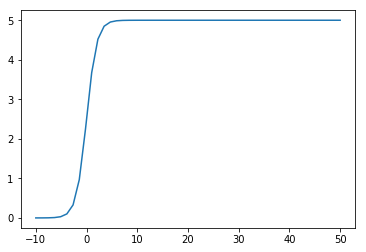

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10,50)
sigm = (1. / (1 + np.exp(-1 * (x - 0)))) *5 - (-1. / (1 + np.exp(1 * (x - 30))) +1) *0
plt.plot(x, sigm)

In [ ]:
interp_data.update_interpolator(geo_data)

In [ ]:
interp_data.interpolator.tg.n_formation_float.get_value()

In [ ]:
interp_data.interpolator.tg.n_formation_float.set_value(np.array([ 1.,  2.,  3.,  4.,  5., 6.], dtype='float32'))

In [ ]:
sol = gp.compute_model(interp_data)

In [ ]:
%matplotlib notebook
gp.plot_section(geo_data,sol[0][0].astype(float), 30, plot_data = True, direction='y')

In [ ]:
interp_data.interpolator.tg.n_formation_float.set_value(np.array([ 1.,  2.,  3.,  4.,  5., 6.], dtype='float32'))

In [ ]:
interp_data.interpolator.tg.n_formations_per_serie.get_value()

In [ ]:
interp_data.interpolator.tg.len_series_i.set_value(np.array([ 0,  4, 35], dtype='int32'))

In [ ]:
interp_data.interpolator.tg.len_series_i.get_value()

In [ ]:
interp_data.interpolator.tg.npf.get_value()

In [ ]:
asa = interp_data.get_input_data()

In [ ]:
interp_data.th_fn(*asa)

In [ ]:
interp_data.interpolator.pandas_ref_layer_points

In [ ]:

interp_data.geo_data_res.interfaces.drop(39, inplace=True)